Exercise 1

1. Generate strings of length 15 over the alphabet a, b, c, d

2. Label your strings basing on matching a 5-element regular expression

3. Balance your dataset of size 10000 so that approximately half of the dataset contains regex-matching parts.

4. Prepare your data for training using one-hot encoding

5. Divide your dataset into training and testing parts.

6. Implement and train a model consisting of one convolutional layer with one filter followed by one fully-connected layer and train it to classify your strings. After training, examine the values of the filter

7. Implement and train more complex models (more filters, layers) and analyze their performance on the prepared dataset.

In [52]:
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
def generate_string(length = 15, alphabet = "abcd", pattern = "cabad", contains = True):
      
      pattern_len = len(pattern)
      if contains: 
            # we need to generate prefix and sufix to our pattern both might be 0 lentgth ofc 
            prefix_len = random.randint(0,length - pattern_len)
            suffix_len = length - pattern_len - prefix_len
            prefix = ''.join(random.choices("abcd" , k=prefix_len))
            suffix = ''.join(random.choices("abcd" , k=suffix_len))
            return prefix + pattern + suffix
      else: 
            while True:
                  candidate = ''.join(random.choices("abcd" , k=length))
                  if pattern not in candidate:
                        return candidate
def generate_dataset(size = 10000):
      expressions = []
      labels = []
      half = size // 2
      
      
      for _ in range(half):
            expressions.append(generate_string(length=15,alphabet="abcd",pattern="cabad",contains=True))
            labels.append(1)
      for _ in range(size- half):
            expressions.append(generate_string(length=15,alphabet="abcd",pattern="cabad",contains=False))
            labels.append(0)
            
      return pd.DataFrame({"expressions":expressions,"contains_abcd":labels})

In [53]:
generate_string(contains=False)

'cccdadcdcaabdcb'

In [54]:
df = generate_dataset()

In [55]:
df

,expressions,contains_abcd
0,baaddcabadbabda,1
1,aacabadabcdbbdc,1
2,dddcabadcadbbaa,1
3,dcabadbcbcbcdcc,1
4,cddbccabadcdadc,1
...,...,...
9995,ddbdbaadbbabada,0
9996,cccacccdbcacccb,0
9997,dcbaddbdbdbdbaa,0
9998,dbdcbcaaabaaadd,0


In [56]:
char_indexes = {'a':0,'b':1,'c':2,'d':3}
num_classes = 4

In [57]:
def one_hot_encode_expression(s,map,num_classes):
    one_hot = torch.zeros(size = (len(s),num_classes))
    for i, char in enumerate(s):
        one_hot[i,map[char]] = 1 
    return one_hot
def one_hot_encode_dataset(dataset,shape,map):
    table = torch.empty(size = shape)
    for i,s in enumerate(dataset.iloc[:,0]):
        table[i] = one_hot_encode_expression(s,map = map,num_classes= shape[-1])
    return table

In [58]:
def decode_character(char,characters = ['a','b','c','d']):
    index = torch.argmax(char)
    return characters[index]

def decode_string(dataset, index):
    expression = ""
    for letter in dataset[index]:
        expression += decode_character(letter)
    return expression

In [59]:
s = generate_string()

In [60]:
one_hot_encode_expression(s,char_indexes,num_classes)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.]])

In [61]:
dataset = torch.empty(size = (10000,15,4))

In [62]:
def one_hot_encode_dataset(dataset,shape,map):
    table = torch.empty(size = shape)
    for i,s in enumerate(dataset.iloc[:,0]):
        table[i] = one_hot_encode_expression(s,map = map,num_classes= shape[-1])
    return table

In [63]:
X = one_hot_encode_dataset(dataset=df,shape = (10000,15,4),map =char_indexes)

In [64]:
decode_string(dataset=X,index=5000) == df.iloc[5000,0]  # to make sure that one hot encoding works correctly 

True

In [65]:
y = torch.tensor(data=df.iloc[:,1])  

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)  # to have shape as desired by pytorch

create custom dataset 

In [96]:
from tensorflow.keras import models, layers

simple_model = models.Sequential([
    layers.Input((15, 4)),
    layers.Conv1D(filters = 1, kernel_size=5,use_bias = False),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid',use_bias = False)
])

simple_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

simple_model.fit(X_train, y_train, batch_size= 10,epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.5234 - loss: 0.7734 - val_accuracy: 0.5730 - val_loss: 0.6815
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.6045 - loss: 0.6630 - val_accuracy: 0.6170 - val_loss: 0.6541
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.6270 - loss: 0.6402 - val_accuracy: 0.6205 - val_loss: 0.6507
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.6529 - loss: 0.6267 - val_accuracy: 0.6285 - val_loss: 0.6484
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.6400 - loss: 0.6341 - val_accuracy: 0.6295 - val_loss: 0.6472
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.6487 - loss: 0.6312 - val_accuracy: 0.6335 - val_loss: 0.6471
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.6412 - loss: 0.6342 - val_accuracy: 0.6300 - val_loss: 0.6469
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.6471 - loss: 0

In [97]:
def accuracy_fn(y_pred , y):
    y_pred = np.array(y_pred)
    y = np.array(y)
    counter = 0
    for i in range(len(y)):
        if y[i] != y_pred[i]:
            counter +=1
    return 1 - counter / len(y)

In [98]:
y_test_pred = np.round(simple_model(X_test)).astype('int')

In [99]:
accuracy_fn(y_test_pred,y_test)

0.6485000000000001

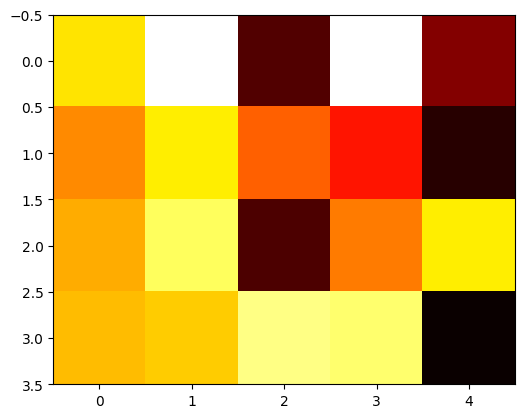

In [109]:
import matplotlib.pyplot as plt

# Access the Conv1D layer
conv_layer = simple_model.layers[0]

# Extract the weights (kernel and bias)
kernel = conv_layer.get_weights()
kernel = np.array(kernel).reshape(4, 5)   # 5 element regex

plt.imshow(kernel, cmap='hot', interpolation='nearest')
plt.show()

In [83]:
model = models.Sequential([
    layers.Conv1D(filters = 32, kernel_size=3, activation='relu', input_shape=(15, 4)),
    layers.MaxPool1D(pool_size = 2),
    layers.Conv1D(64, 3, activation = 'relu'), 
    layers.MaxPool1D(2),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation='sigmoid')
    
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 25, validation_data = (X_test, y_test))

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7477 - loss: 0.4791 - val_accuracy: 0.9840 - val_loss: 0.0619
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9878 - loss: 0.0526 - val_accuracy: 0.9960 - val_loss: 0.0168
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9966 - loss: 0.0173 - val_accuracy: 0.9980 - val_loss: 0.0099
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9971 - loss: 0.0135 - val_accuracy: 0.9985 - val_loss: 0.0092
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9990 - loss: 0.0063 - val_accuracy: 0.9985 - val_loss: 0.0140
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9978 - loss: 0.0085 - val_accuracy: 0.9980 - val_loss: 0.0093
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9985 - loss: 0.0052 - val_accuracy: 0.9985 - val_loss: 0.0129
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9986 - loss: 0.0048 - val_accuracy: 0.

In [84]:
y_test_pred = np.round(model(X_test)).astype('int')

In [85]:
accuracy_fn(y_test_pred,y_test)

0.998